In [1]:
### Import libraries
from datetime import datetime, timedelta

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' # Matplotlib 한글서체 오류처리
plt.rc('axes', unicode_minus=False)

# !pip install yfinance
# import yfinance as yf  # Yahoo Finance API

# !pip install pykrx
# from pykrx import stock  # 네이버금융

# !pip install pandas-datareader # 주식 데이터 조회
import pandas_datareader as web

# !pip install mplfinance # 금융차트
import mplfinance as mpf
# 한국식 캔들차트 생성을 위한 스타일 지정 (상승-빨강, 하락-파랑)
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='tab:blue')
s = mpf.make_mpf_style(marketcolors= colorset)

In [2]:
capital = pd.read_excel('position.xlsx', sheet_name='capital')
eva = pd.read_excel('position.xlsx', sheet_name='eva')
position = pd.read_excel('position.xlsx', sheet_name='position')

ticker = pd.read_excel('position.xlsx', sheet_name='ticker')

tkstring = []

for tk in ticker.TICKER:
    tkstring.append('0' * (6 - len(str(tk))) + str(tk))    
    
ticker.TICKER = tkstring
# ticker.tail()

----------------------------
최근 360 일 데이터 조회
----------------------------

** ARIRANG 미국단기우량회사채 **
Ticker  : 332610
Market  : US
Type    : Bond
MEAN +/-: 3 %
MAX/MIN : 110 / 99
RANGE.  : 11
PV      : 110


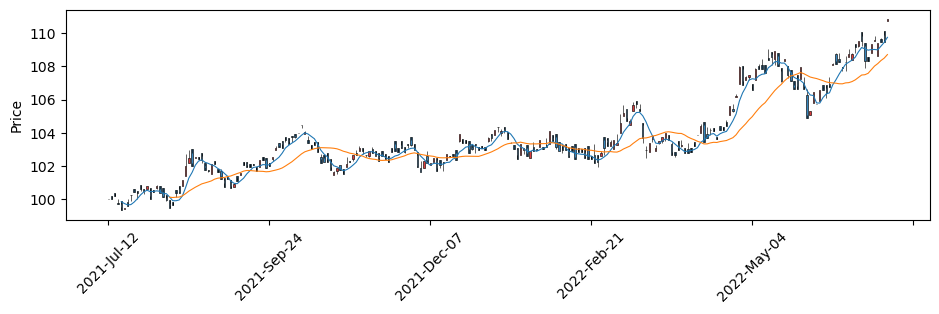

** TIGER 골드선물(H) **
Ticker  : 319640
Market  : Global
Type    : Commodity
MEAN +/-: 1 %
MAX/MIN : 110 / 95
RANGE.  : 15
PV      : 97


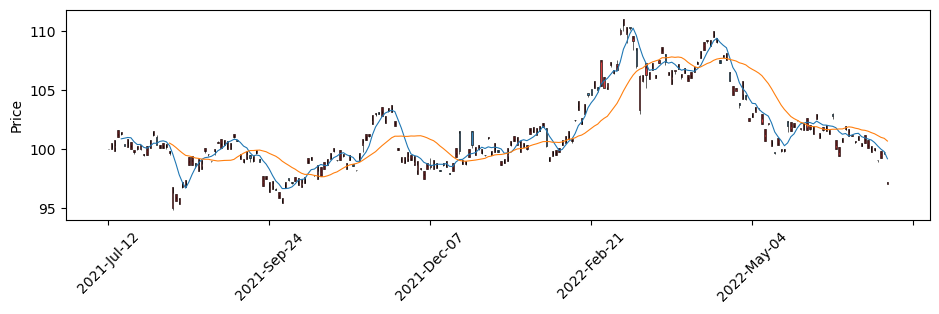

** 신한 인버스 옥수수 선물 ETN(H) **
Ticker  : 500014
Market  : Global
Type    : Commodity
MEAN +/-: -17 %
MAX/MIN : 103 / 62
RANGE.  : 41
PV      : 82


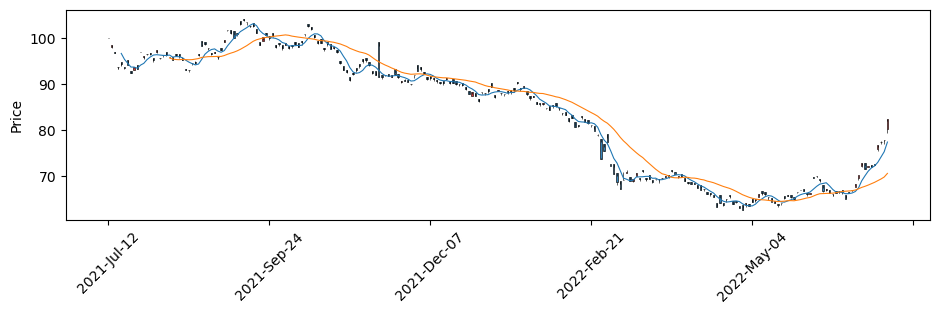

** 대신 인버스 아연선물 ETN(H) **
Ticker  : 510004
Market  : Global
Type    : Commodity
MEAN +/-: -18 %
MAX/MIN : 101 / 56
RANGE.  : 45
PV      : 90


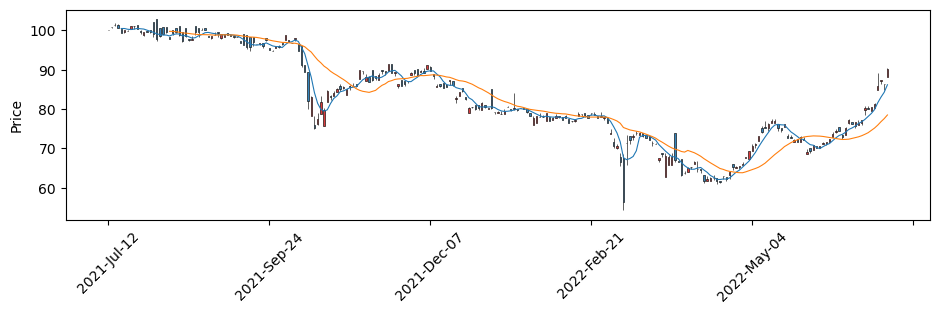

** 대신 인버스 니켈선물 ETN(H) **
Ticker  : 510006
Market  : Global
Type    : Commodity
MEAN +/-: -31 %
MAX/MIN : 102 / 25
RANGE.  : 77
PV      : 38


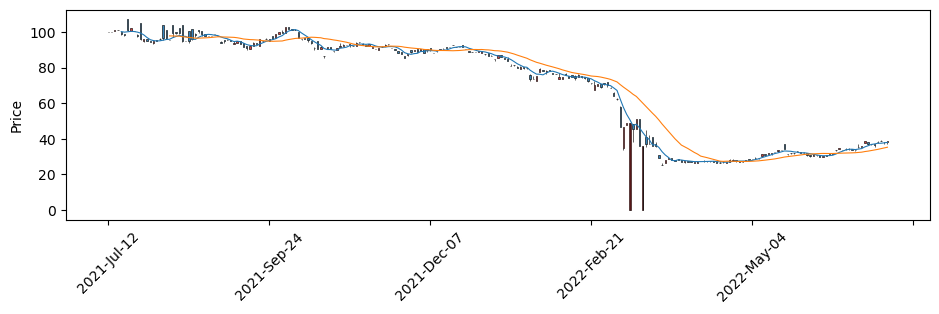

** 대신 인버스 알루미늄 선물 ETN(H) **
Ticker  : 510018
Market  : Global
Type    : Commodity
MEAN +/-: -15 %
MAX/MIN : 107 / 64
RANGE.  : 43
PV      : 107


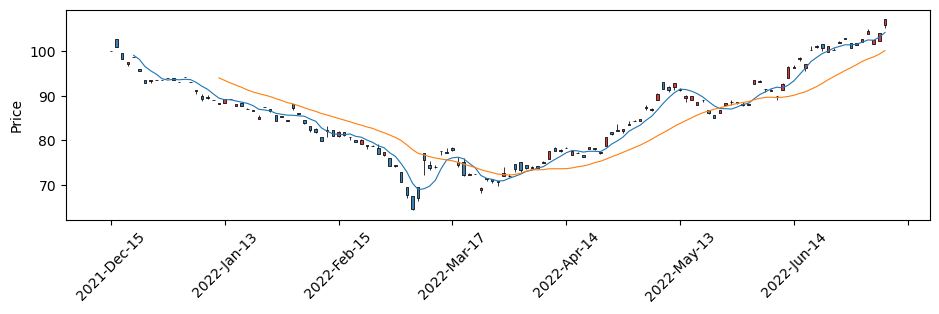

** ARIRANG 신흥국MSCI(합성 H) **
Ticker  : 195980
Market  : Global
Type    : Index
MEAN +/-: -11 %
MAX/MIN : 101 / 72
RANGE.  : 29
PV      : 72


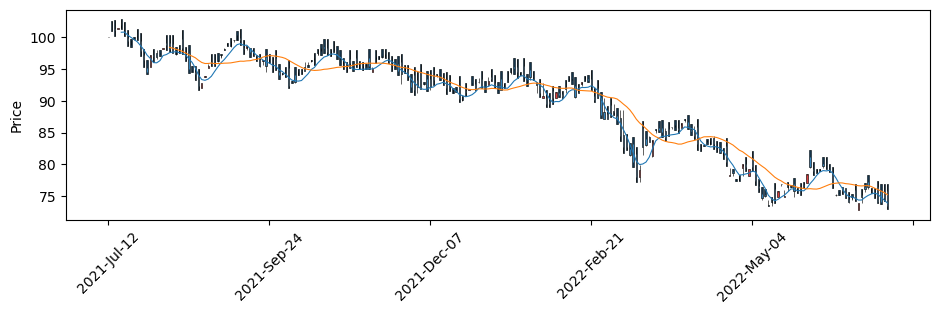

** KOSEF 인도Nifty50(합성) **
Ticker  : 200250
Market  : Global
Type    : Index
MEAN +/-: 11 %
MAX/MIN : 121 / 99
RANGE.  : 22
PV      : 105


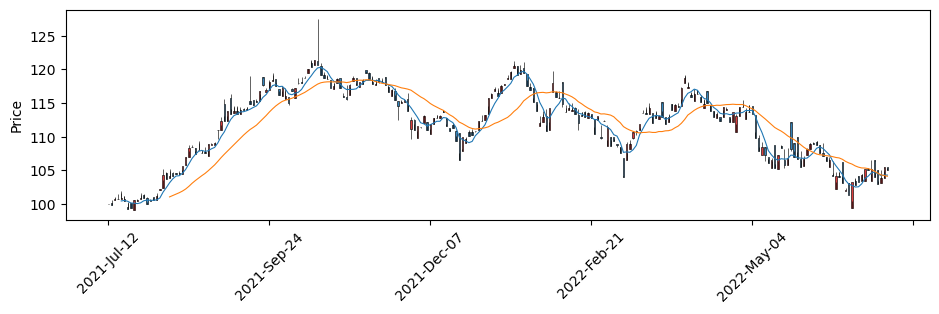

** KINDEX 인도네시아MSCI(합성) **
Ticker  : 256440
Market  : Global
Type    : Index
MEAN +/-: 19 %
MAX/MIN : 143 / 98
RANGE.  : 45
PV      : 118


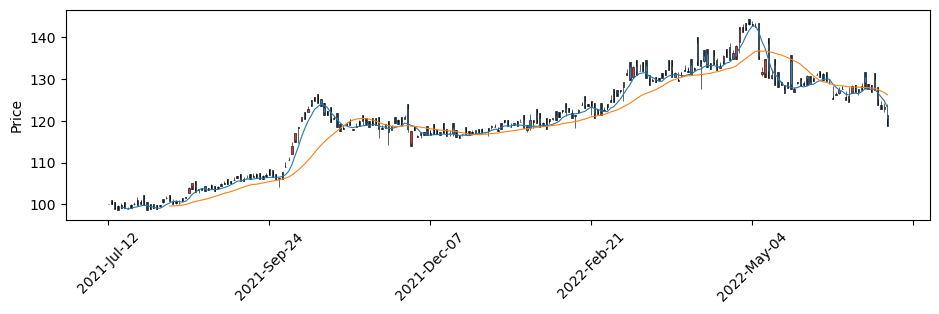

** ARIRANG 신흥국MSCI인버스(합성 H) **
Ticker  : 373530
Market  : Global
Type    : Index
MEAN +/-: 7 %
MAX/MIN : 124 / 97
RANGE.  : 27
PV      : 124


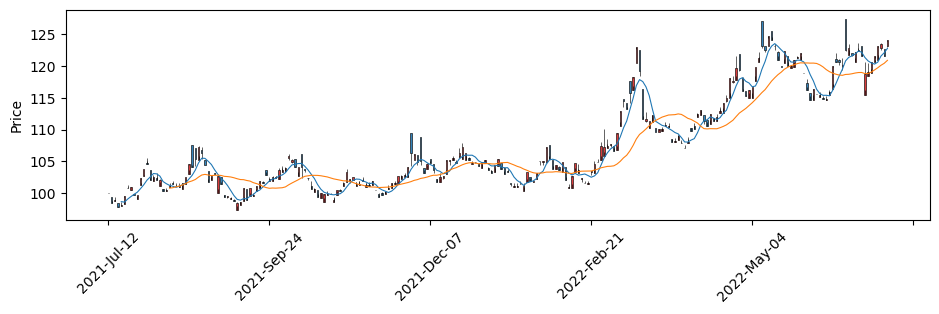

** TIGER 일본니케이225 **
Ticker  : 241180
Market  : JP
Type    : Index
MEAN +/-: -4 %
MAX/MIN : 110 / 84
RANGE.  : 26
PV      : 85


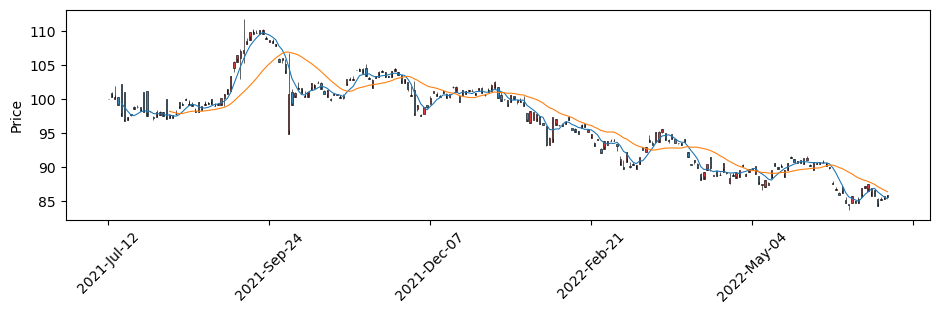

** KODEX 200 **
Ticker  : 069500
Market  : KR
Type    : Index
MEAN +/-: -12 %
MAX/MIN : 101 / 71
RANGE.  : 30
PV      : 71


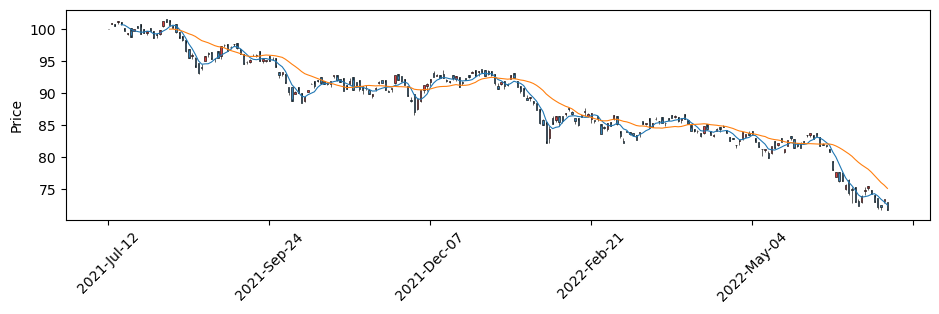

** TIGER 인버스 **
Ticker  : 123310
Market  : KR
Type    : Index
MEAN +/-: 12 %
MAX/MIN : 137 / 98
RANGE.  : 39
PV      : 137


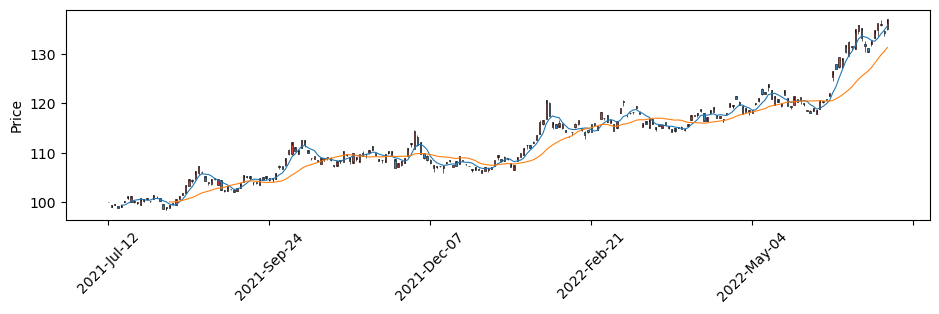

** TIGER 미국나스닥100 **
Ticker  : 133690
Market  : US
Type    : Index
MEAN +/-: 2 %
MAX/MIN : 116 / 85
RANGE.  : 31
PV      : 90


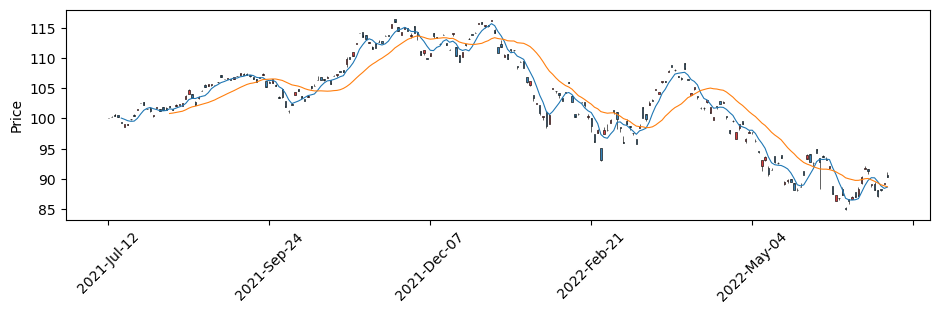

** TIGER 미국S&P500 **
Ticker  : 360750
Market  : US
Type    : Index
MEAN +/-: 5 %
MAX/MIN : 114 / 95
RANGE.  : 19
PV      : 100


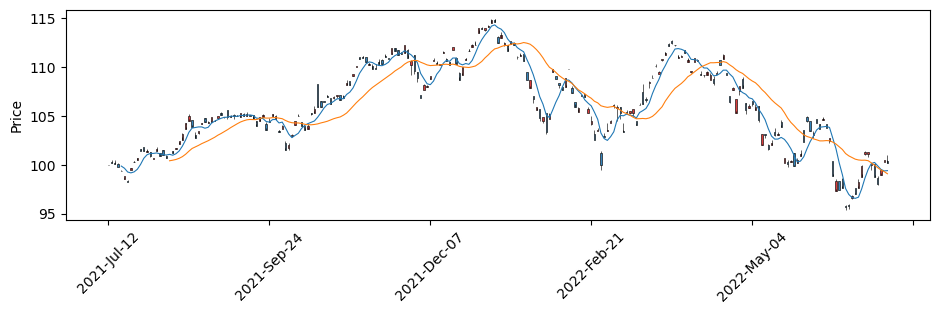

** 신한 S&P500 VIX S/T 선물 ETN C **
Ticker  : 500058
Market  : US
Type    : Index
MEAN +/-: -18 %
MAX/MIN : 113 / 61
RANGE.  : 52
PV      : 84


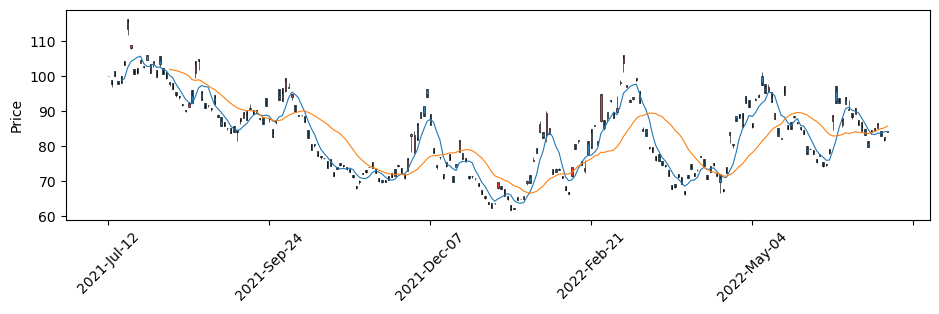

** TRUE S&P500 양매도 4% OTM ETN(H) **
Ticker  : 570049
Market  : US
Type    : Index
MEAN +/-: 4 %
MAX/MIN : 110 / 99
RANGE.  : 11
PV      : 106


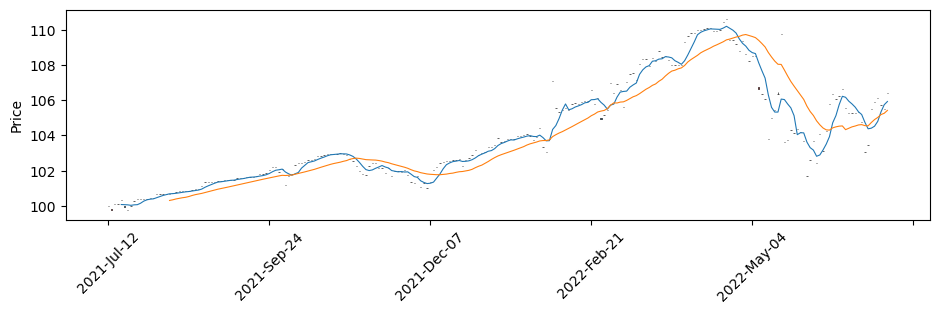

** KODEX 미국나스닥100선물인버스(H) **
Ticker  : 409810
Market  : US
Type    : Index
MEAN +/-: 15 %
MAX/MIN : 137 / 98
RANGE.  : 39
PV      : 132


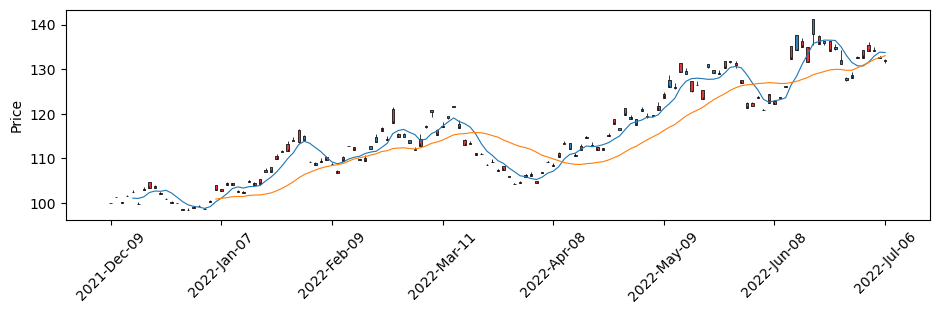

** TIGER 차이나전기차SOLACTIVE **
Ticker  : 371460
Market  : CN
Type    : Sector
MEAN +/-: -5 %
MAX/MIN : 118 / 63
RANGE.  : 55
PV      : 102


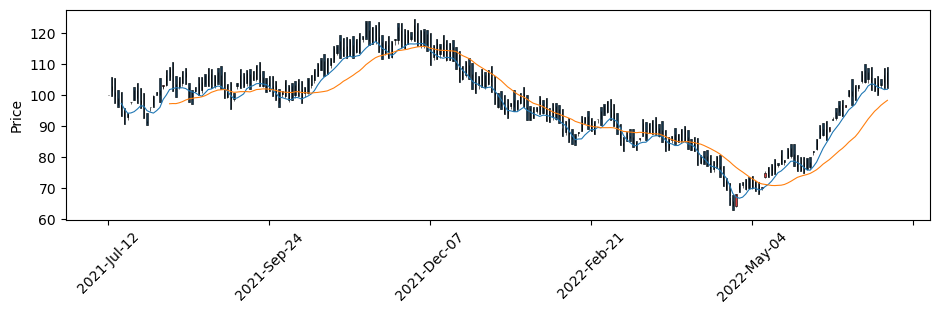

** TIGER 글로벌리튬&2차전지 SOLACTIVE(합성) **
Ticker  : 394670
Market  : CN
Type    : Sector
MEAN +/-: 7 %
MAX/MIN : 127 / 89
RANGE.  : 38
PV      : 104


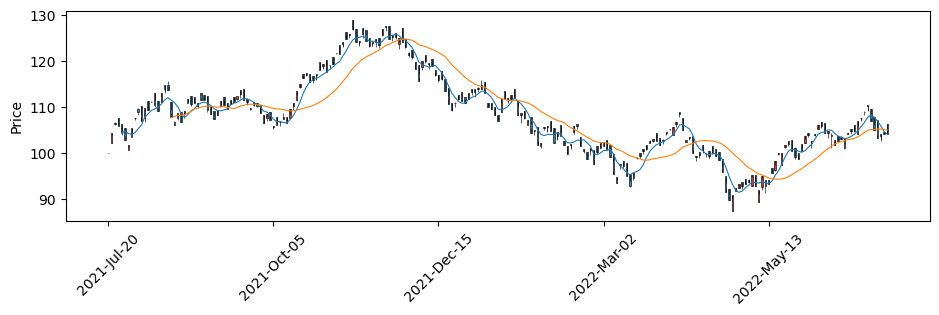

** KOSEF 릭소글로벌퓨처모빌리티MSCI **
Ticker  : 394350
Market  : Global
Type    : Sector
MEAN +/-: 8 %
MAX/MIN : 128 / 91
RANGE.  : 37
PV      : 92


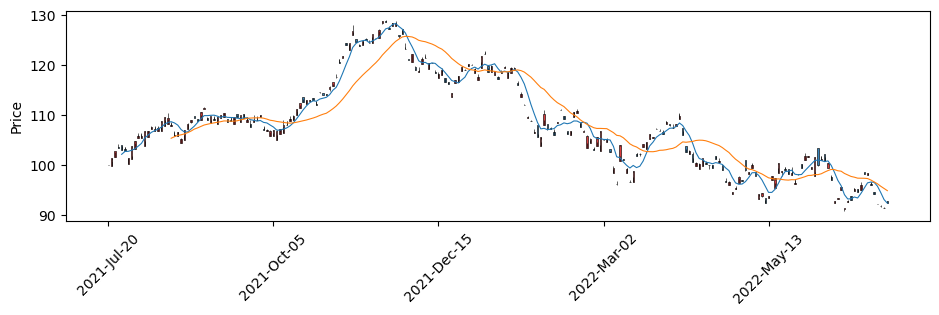

** TIGER 경기방어 **
Ticker  : 139280
Market  : KR
Type    : Sector
MEAN +/-: -15 %
MAX/MIN : 101 / 72
RANGE.  : 29
PV      : 76


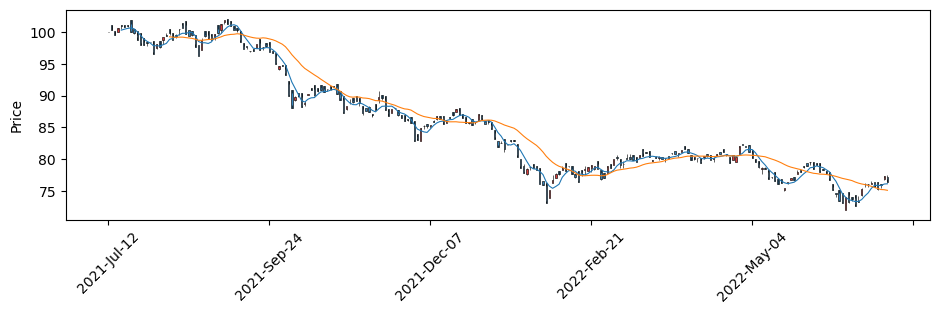

** TIGER 소프트웨어 **
Ticker  : 157490
Market  : KR
Type    : Sector
MEAN +/-: -21 %
MAX/MIN : 102 / 50
RANGE.  : 52
PV      : 52


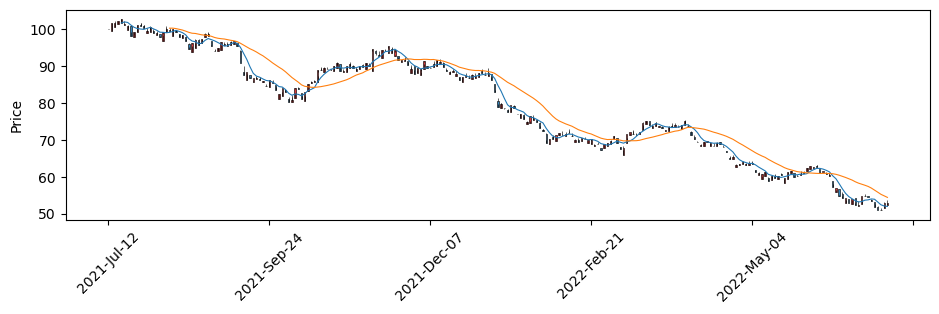

** KODEX 필수소비재 **
Ticker  : 266410
Market  : KR
Type    : Sector
MEAN +/-: -17 %
MAX/MIN : 101 / 68
RANGE.  : 33
PV      : 70


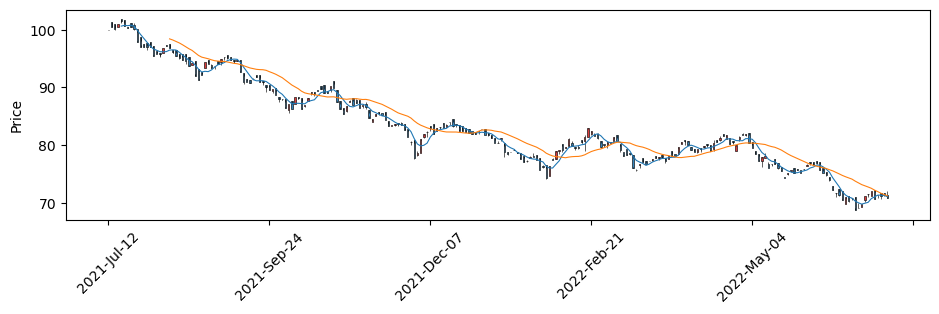

** TIGER 2차전지테마 **
Ticker  : 305540
Market  : KR
Type    : Sector
MEAN +/-: 10 %
MAX/MIN : 130 / 88
RANGE.  : 42
PV      : 90


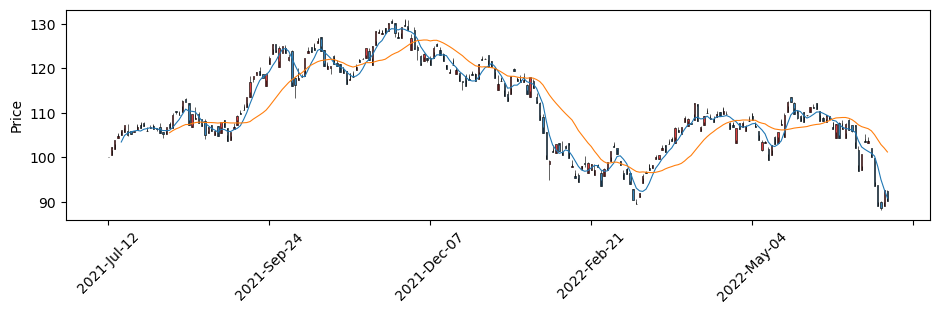

** TIGER 리츠부동산인프라 **
Ticker  : 329200
Market  : KR
Type    : Sector
MEAN +/-: 3 %
MAX/MIN : 113 / 96
RANGE.  : 17
PV      : 97


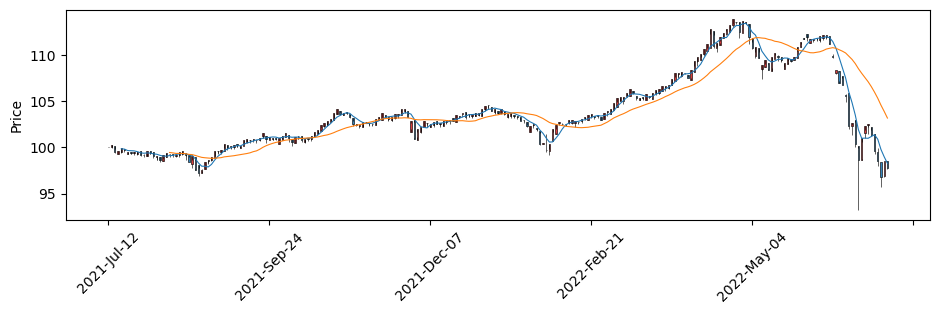

** KBSTAR Fn수소경제테마 **
Ticker  : 367770
Market  : KR
Type    : Sector
MEAN +/-: -12 %
MAX/MIN : 103 / 70
RANGE.  : 33
PV      : 70


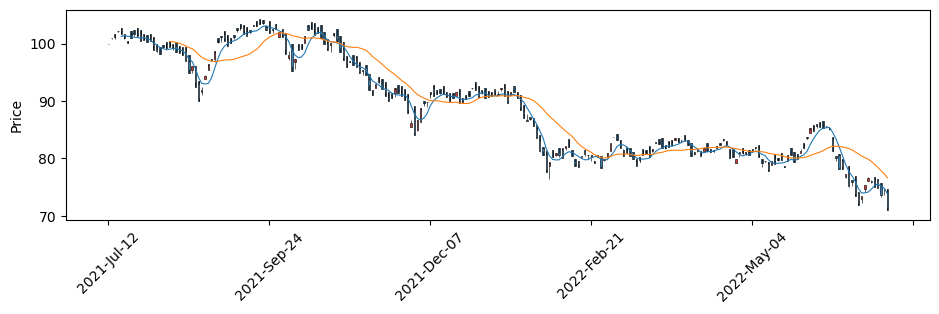

** KODEX 미국S&P에너지(합성) **
Ticker  : 218420
Market  : US
Type    : Sector
MEAN +/-: 27 %
MAX/MIN : 194 / 88
RANGE.  : 106
PV      : 149


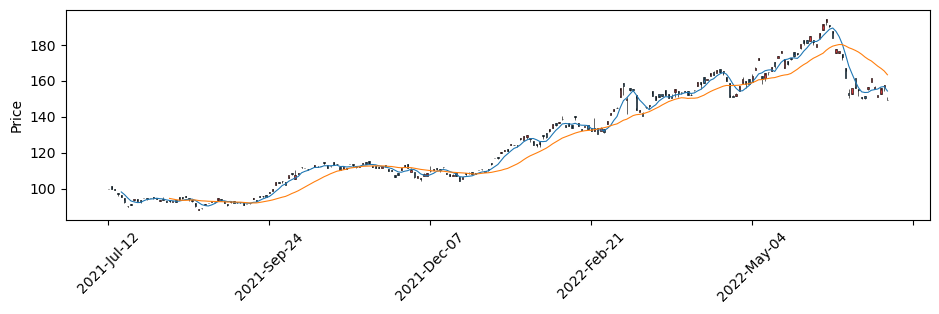

** TIGER S&P글로벌인프라(합성) **
Ticker  : 269370
Market  : US
Type    : Sector
MEAN +/-: 8 %
MAX/MIN : 121 / 97
RANGE.  : 24
PV      : 114


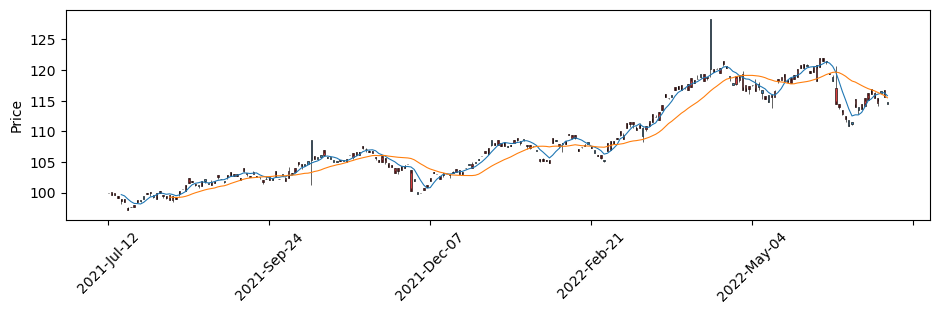

** KIDEX 미국WideMoat가치주 **
Ticker  : 309230
Market  : US
Type    : Sector
MEAN +/-: 3 %
MAX/MIN : 108 / 93
RANGE.  : 15
PV      : 99


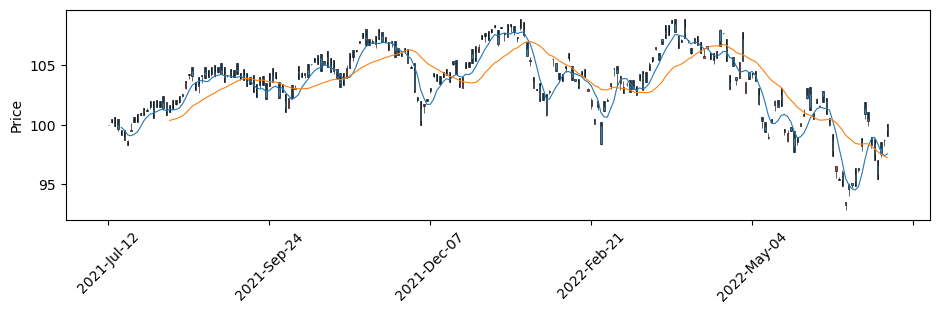

** TIGER 글로벌클라우드컴퓨팅INDXX **
Ticker  : 371450
Market  : US
Type    : Sector
MEAN +/-: -10 %
MAX/MIN : 115 / 62
RANGE.  : 53
PV      : 70


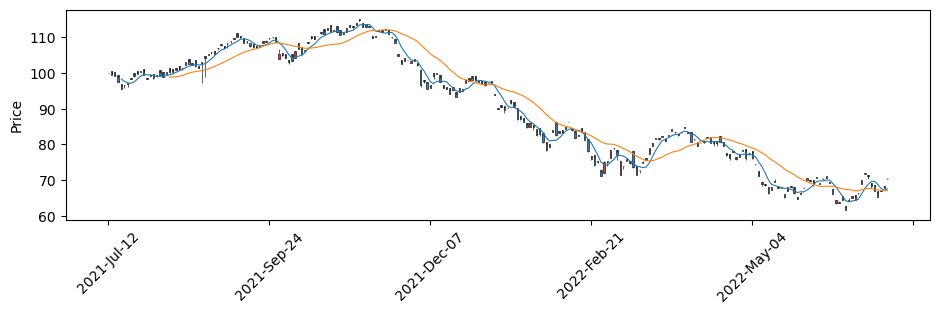

** KOSEF 미국방어배당성장나스닥 **
Ticker  : 373790
Market  : US
Type    : Sector
MEAN +/-: 11 %
MAX/MIN : 125 / 99
RANGE.  : 26
PV      : 119


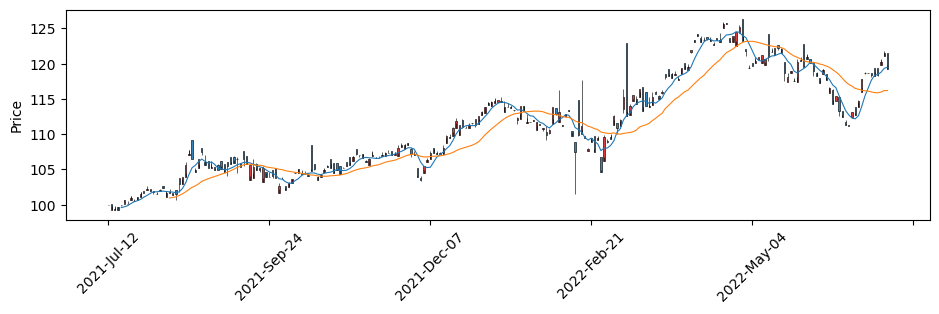

** 삼성 미국 대형 가치주 ETN **
Ticker  : 530020
Market  : US
Type    : Sector
MEAN +/-: 11 %
MAX/MIN : 125 / 95
RANGE.  : 30
PV      : 112


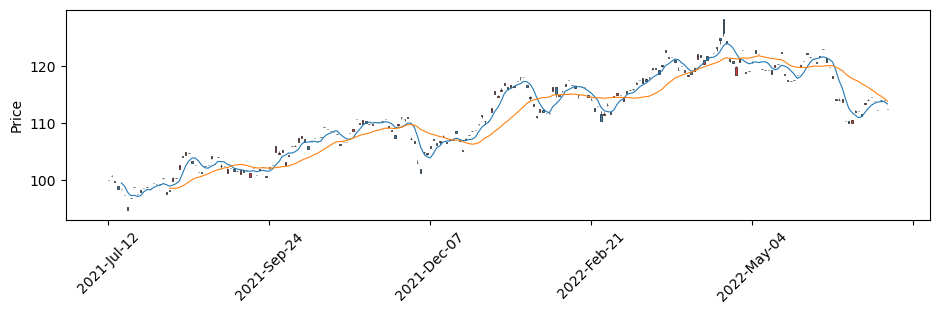

In [3]:
daydelta = 360   # 조회될 기간 설정. 일 기준
today = datetime.today()

start = (today + timedelta(days= -1 * daydelta)).strftime('%Y-%m-%d')
end = today.strftime('%Y-%m-%d')

print('----------------------------')
print('최근', daydelta, '일 데이터 조회')
print('----------------------------')
print()

l_perf = []
for i, row in ticker.sort_values(['TYPE', 'MARKET', 'POSITION']).iterrows():
    try:
        if row.MONITOR:
            data = web.naver.NaverDailyReader(row.TICKER, start= start, end= end).read().astype('int')
            data = data / data.iloc[0] * 100
            cmean = int(data.Close.mean()) - 100
            cmax = int(data.Close.max())
            cmin = int(data.Close.min())
            rng = cmax - cmin
            cpv = int(data.Close[-1])
            l_perf.append([row.TICKER, row.NAME, row.MARKET, row.TYPE, cmean, cmax, cmin, rng, cpv])
            
            print('**', row.NAME, '**')
            print('Ticker  :', row.TICKER)
            print('Market  :', row.MARKET)
            print('Type    :', row.TYPE)
            print('MEAN +/-:', cmean, '%')
            print('MAX/MIN :', cmax, '/', cmin)
            print('RANGE.  :', rng)
            print('PV      :', cpv)
            fig, axlist = mpf.plot(data, type='candle', style= s, figsize= (12, 3), returnfig= True, mav=(5, 20))

        # Annotation
#         for pi, prow in position.loc[position.TICKER == row.TICKER].iterrows():
#             if data.index[0] < pd.to_datetime(prow.DATE):
#                 x = data.reset_index().index[data.index == prow.DATE].item()
# #                 y = data.loc[data.index == prow.DATE, 'Close'].item()
#                 y = prow.PRICE
#                 cap = str(prow.CAP * -1)
#                 stocks = str(prow.STOCKS)
#                 sb = 'SELL' if prow.SELL else 'BUY'
#                 axlist[0].annotate(sb + ', ' + stocks, (x, y), xytext=(x, y*0.95), arrowprops= dict(arrowstyle='->'))
            plt.show()
    except:
        print('************* ERROR on', row.NAME)
        pass
    
performance = pd.DataFrame(data= l_perf, columns= ['TICKER', 'NAME', 'MARKET', 'TYPE', 'MEAN+/-', 'MAX', 'MIN', 'RNG', 'PV'])
performance.set_index(['TICKER'], inplace= True)

In [6]:
performance.sort_values(by= ['PV'], ascending= True)

,NAME,MARKET,TYPE,MEAN+/-,MAX,MIN,RNG,PV
TICKER,,,,,,,,
510006,대신 인버스 니켈선물 ETN(H),Global,Commodity,-31,102,25,77,38
157490,TIGER 소프트웨어,KR,Sector,-21,102,50,52,52
266410,KODEX 필수소비재,KR,Sector,-17,101,68,33,70
367770,KBSTAR Fn수소경제테마,KR,Sector,-12,103,70,33,70
371450,TIGER 글로벌클라우드컴퓨팅INDXX,US,Sector,-10,115,62,53,70
069500,KODEX 200,KR,Index,-12,101,71,30,71
195980,ARIRANG 신흥국MSCI(합성 H),Global,Index,-11,101,72,29,72
139280,TIGER 경기방어,KR,Sector,-15,101,72,29,76
500014,신한 인버스 옥수수 선물 ETN(H),Global,Commodity,-17,103,62,41,82


In [7]:
performance.sort_values(by= ['RNG'], ascending= True)

,NAME,MARKET,TYPE,MEAN+/-,MAX,MIN,RNG,PV
TICKER,,,,,,,,
332610,ARIRANG 미국단기우량회사채,US,Bond,3,110,99,11,110
570049,TRUE S&P500 양매도 4% OTM ETN(H),US,Index,4,110,99,11,106
309230,KIDEX 미국WideMoat가치주,US,Sector,3,108,93,15,99
319640,TIGER 골드선물(H),Global,Commodity,1,110,95,15,97
329200,TIGER 리츠부동산인프라,KR,Sector,3,113,96,17,97
360750,TIGER 미국S&P500,US,Index,5,114,95,19,100
200250,KOSEF 인도Nifty50(합성),Global,Index,11,121,99,22,105
269370,TIGER S&P글로벌인프라(합성),US,Sector,8,121,97,24,114
241180,TIGER 일본니케이225,JP,Index,-4,110,84,26,85


In [8]:
performance.sort_values(by= ['MIN'], ascending= True)

,NAME,MARKET,TYPE,MEAN+/-,MAX,MIN,RNG,PV
TICKER,,,,,,,,
510006,대신 인버스 니켈선물 ETN(H),Global,Commodity,-31,102,25,77,38
157490,TIGER 소프트웨어,KR,Sector,-21,102,50,52,52
510004,대신 인버스 아연선물 ETN(H),Global,Commodity,-18,101,56,45,90
500058,신한 S&P500 VIX S/T 선물 ETN C,US,Index,-18,113,61,52,84
500014,신한 인버스 옥수수 선물 ETN(H),Global,Commodity,-17,103,62,41,82
371450,TIGER 글로벌클라우드컴퓨팅INDXX,US,Sector,-10,115,62,53,70
371460,TIGER 차이나전기차SOLACTIVE,CN,Sector,-5,118,63,55,102
510018,대신 인버스 알루미늄 선물 ETN(H),Global,Commodity,-15,107,64,43,107
266410,KODEX 필수소비재,KR,Sector,-17,101,68,33,70
